In [1]:
import cv2

# Template matching

Template matching is the simplest form of object detection

It simply scans a larger image for a provided template by sliding the template target image across the larger image

The main option that can be adjusted is the comparison method used as the target template is slid across the larger image.

The methods are all some sort of correlation based metric.



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
full = cv2.imread("../DATA/sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

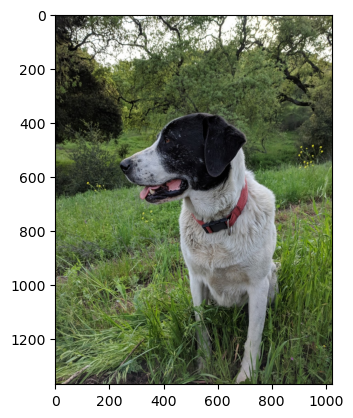

In [4]:
plt.imshow(full)

In [6]:
face = cv2.imread("../DATA/sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

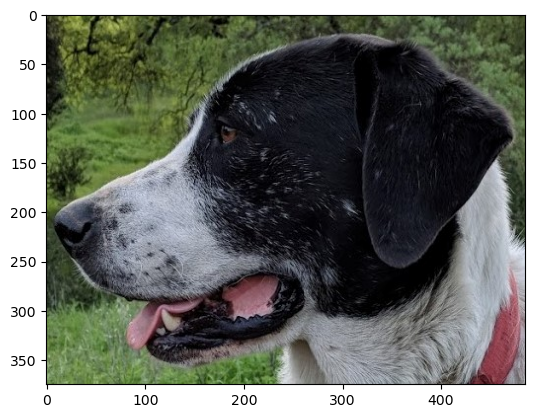

In [7]:
plt.imshow(face)

In [8]:
face.shape

(375, 486, 3)

In [9]:
full.shape

(1367, 1025, 3)

In [10]:
sum([1,2,3])

6

In [11]:
mystring = "sum"

In [12]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [15]:
myfunc = eval("sum")

In [16]:
myfunc([1,2,3])

6

In [17]:
# 6 different methods of template matching

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

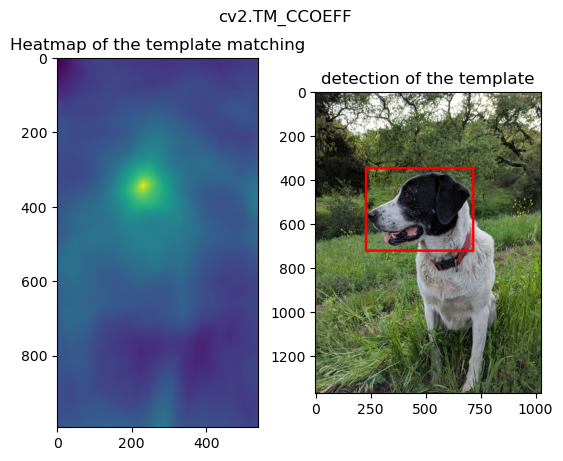

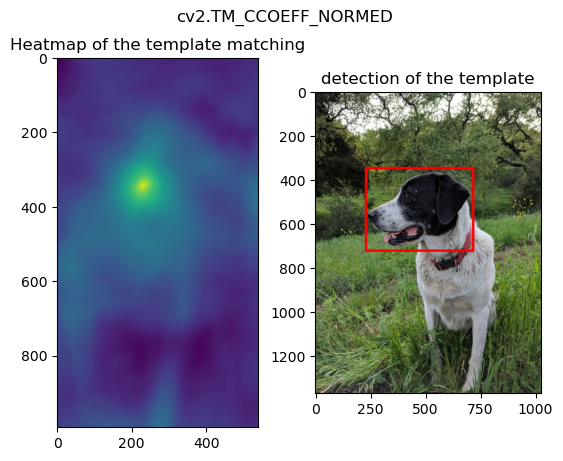

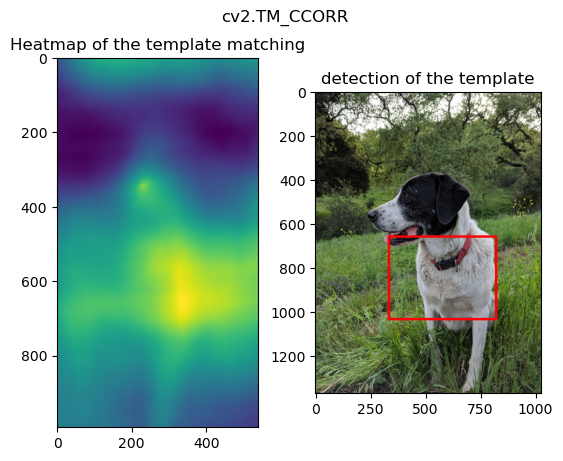

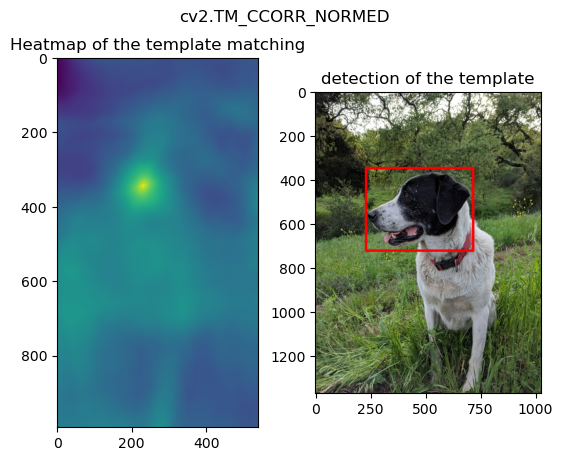

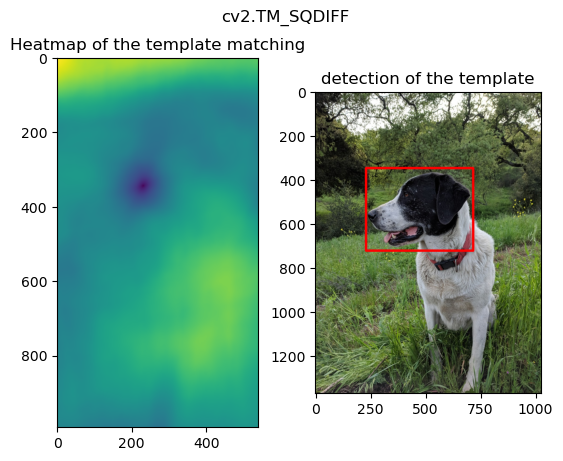

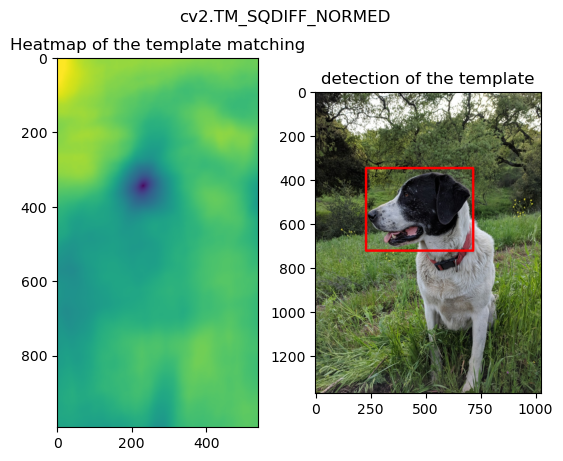

In [20]:
for m in methods:

    # create a copy of image
    full_copy = full.copy()

    method = eval(m)

    # template matching
    res = cv2.matchTemplate(full_copy, face, method)

    min_val, max_value, min_loc, max_loc = cv2.minMaxLoc(res)

    if method  in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    height, width, channels = face.shape

    bottom_right = (top_left[0]+width, top_left[1]+height)

    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0,0), 10)

    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heatmap of the template matching")

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("detection of the template")
    plt.suptitle(m)

    plt.show()
    print("\n")
    print("\n")

In [18]:
my_method = eval("cv2.TM_CCOEFF")
res = cv2.matchTemplate(full, face, my_method)

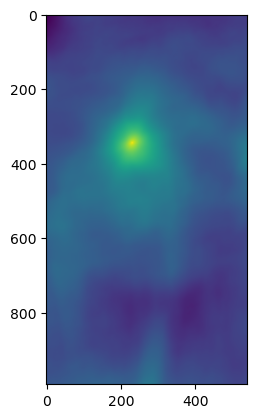

In [19]:
plt.imshow(res)